# 1. Explorative Datenanalyse (EDA)

**KI1-Projekt 308** — California Housing Datensatz

Ziel: Den Datensatz verstehen, Verteilungen und Korrelationen analysieren,
Datenbereinigung dokumentieren.

In [23]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data import load_raw_data, clean_data, load_and_clean_data
from utils.plotting import (
    plot_correlation_heatmap,
    plot_histograms,
    plot_features_vs_target,
    save_fig,
)

plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## 1.1 Rohdaten laden und inspizieren

In [24]:
df_raw = load_raw_data()
print(f"Datensatz: {df_raw.shape[0]} Zeilen, {df_raw.shape[1]} Spalten")
print(f"\nFeatures: {list(df_raw.columns[:-1])}")
print(f"Zielvariable: {df_raw.columns[-1]}")
df_raw.head()

Datensatz: 20640 Zeilen, 9 Spalten

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Zielvariable: MedHouseVal


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 1.2 Verteilungen der Features (Histogramme)

Gespeichert: results/eda_histograms_raw.png und results/eda_histograms_raw.pdf


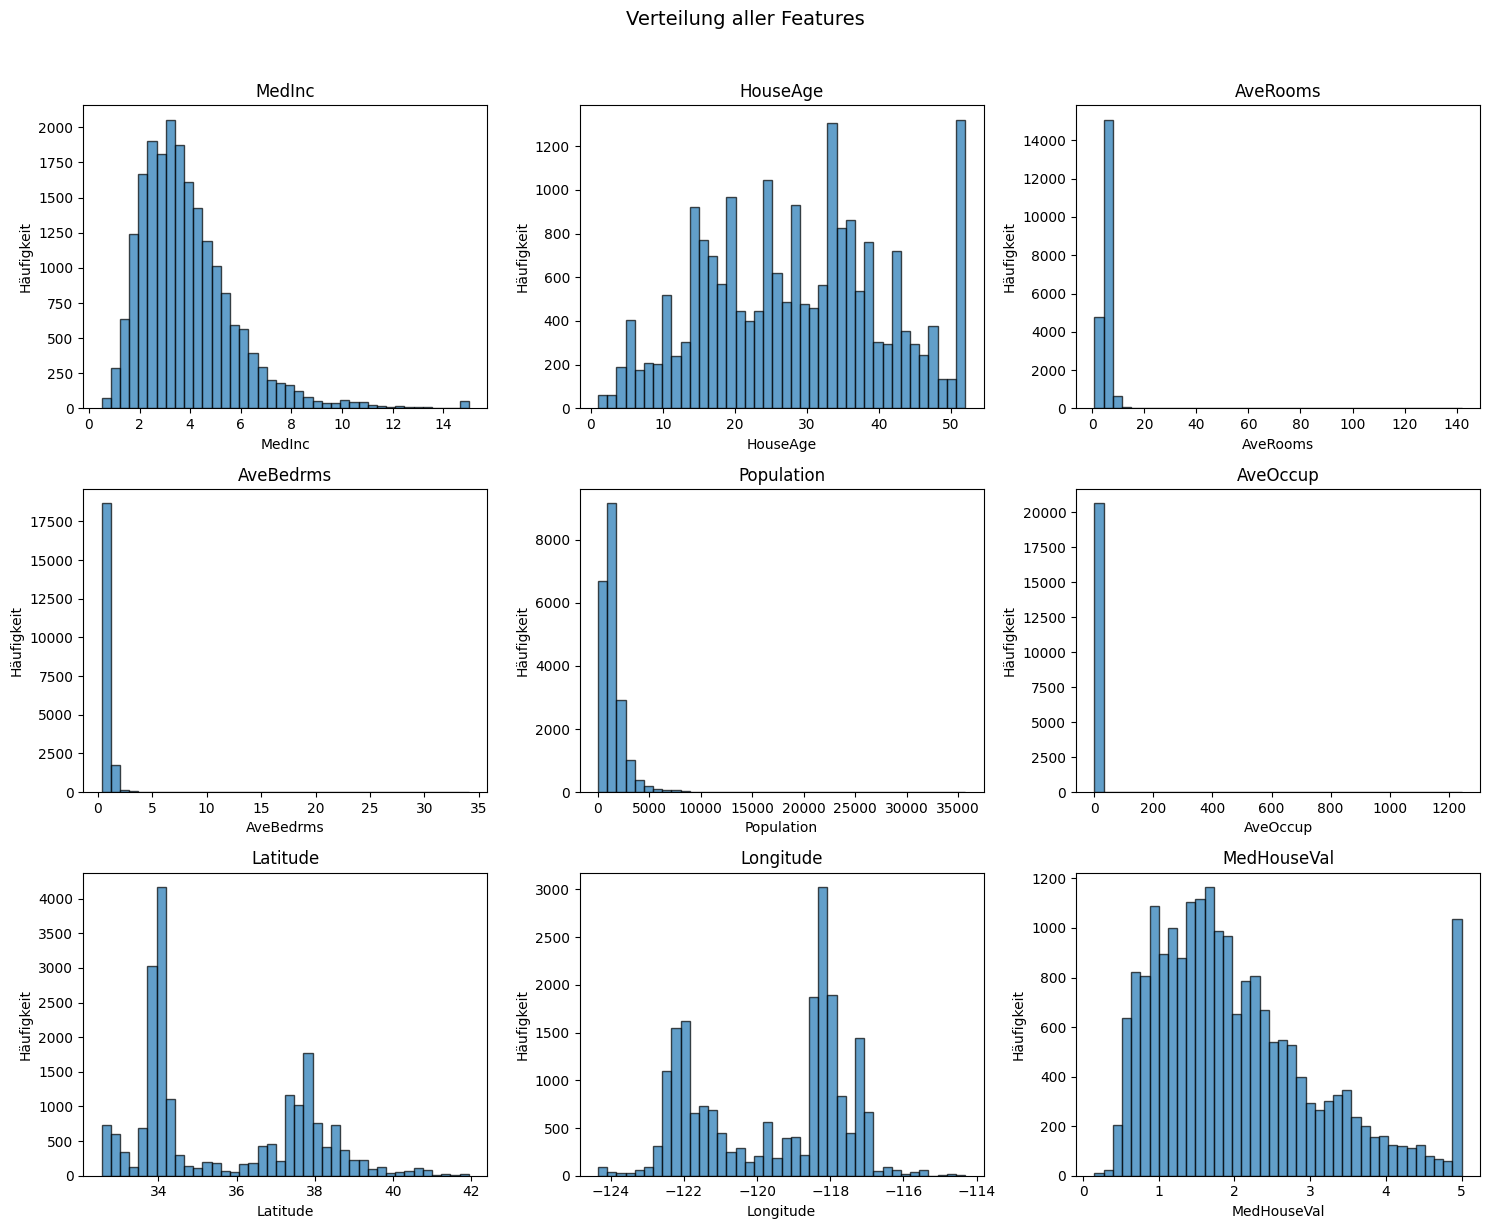

In [27]:
fig, axes = plot_histograms(df_raw, bins=40, save_name="eda_histograms_raw")
plt.show()

**Beobachtungen:**
- `MedHouseVal` hat einen Cut-off bei 5.001 (Deckelung)
- `HouseAge` hat einen Cut-off bei 52 (Maximum)
- `AveRooms`, `AveBedrms`, `Population`, `AveOccup` haben starke Outlier

## 1.3 Features vs. Hauspreis (Scatterplots)

Gespeichert: results/eda_features_vs_target_raw.png und results/eda_features_vs_target_raw.pdf


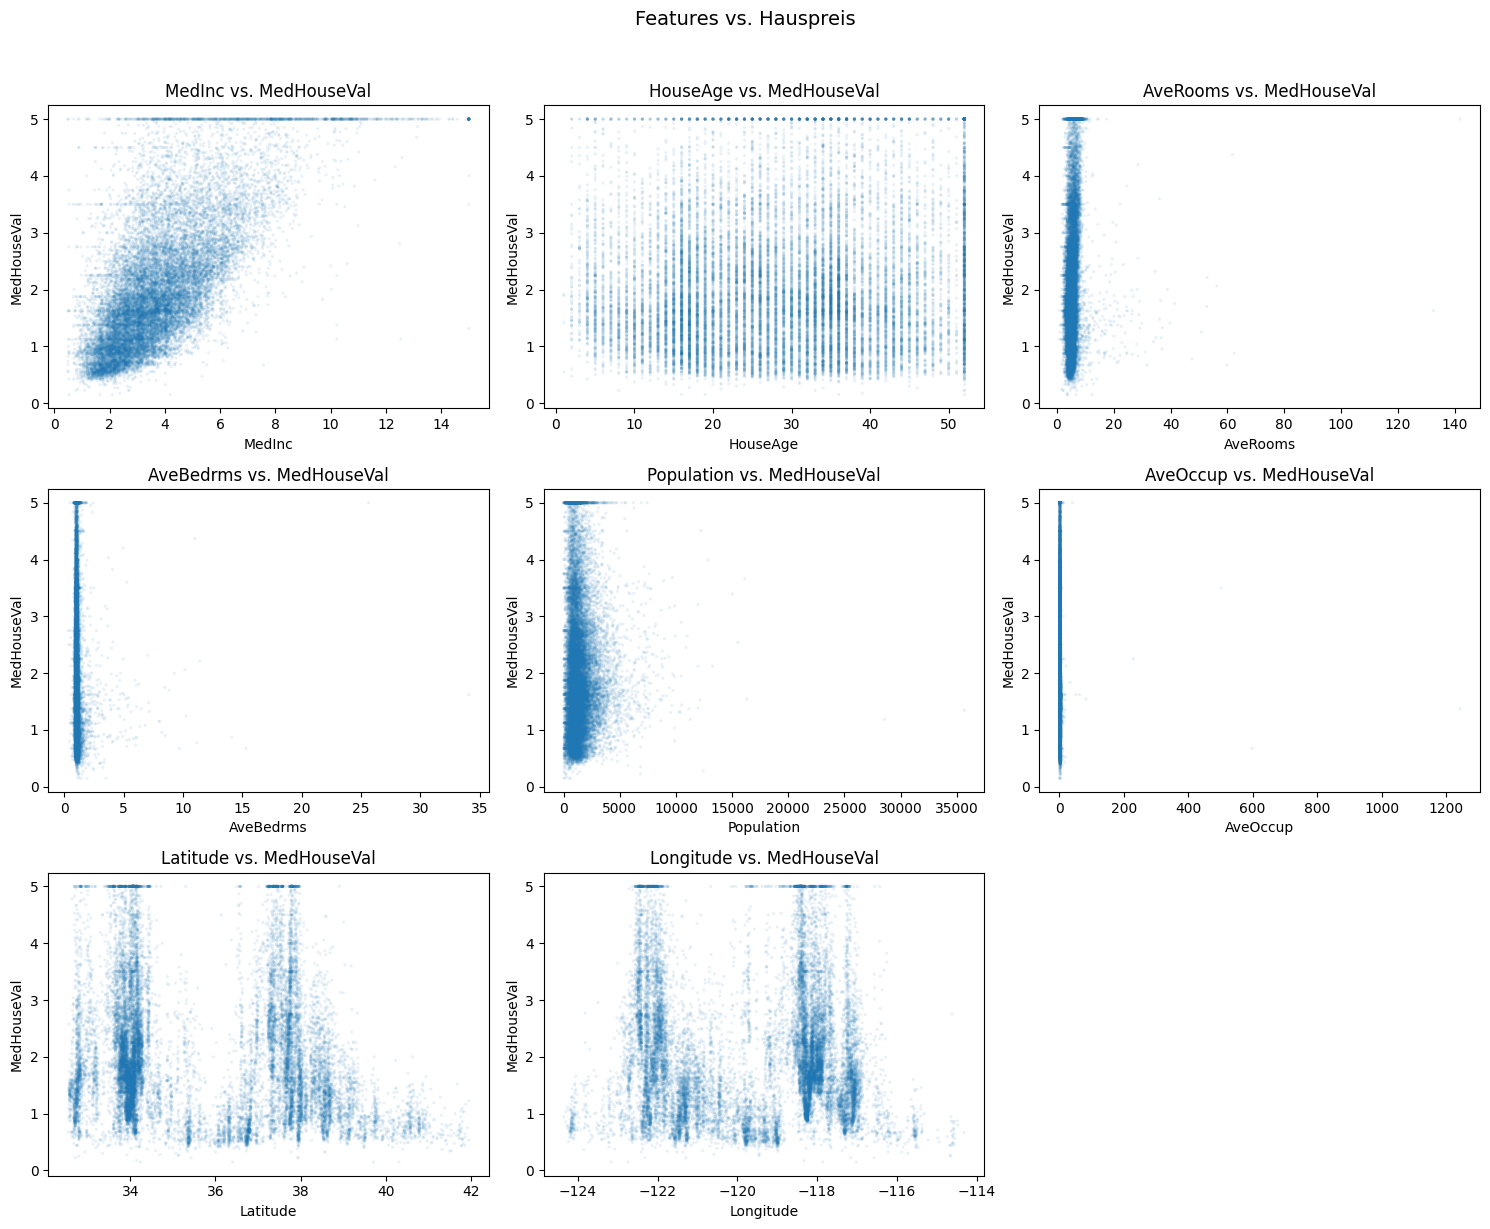

In [28]:
fig, axes = plot_features_vs_target(df_raw, save_name="eda_features_vs_target_raw")
plt.show()

## 1.4 Datenbereinigung

Strategie (nach Vorlage Blatt 10):
1. Cut-off-Werte bei `MedHouseVal` und `HouseAge` entfernen
2. Outlier über dem 98%-Quantil bei `AveRooms`, `AveBedrms`, `Population`, `AveOccup` entfernen

In [29]:
df_clean = clean_data(df_raw)
print(f"Rohdaten:    {df_raw.shape[0]} Zeilen")
print(f"Bereinigt:   {df_clean.shape[0]} Zeilen")
print(f"Entfernt:    {df_raw.shape[0] - df_clean.shape[0]} Zeilen ({(df_raw.shape[0] - df_clean.shape[0]) / df_raw.shape[0] * 100:.1f}%)")

Rohdaten:    20640 Zeilen
Bereinigt:   17386 Zeilen
Entfernt:    3254 Zeilen (15.8%)


Gespeichert: results/eda_histograms_clean.png und results/eda_histograms_clean.pdf


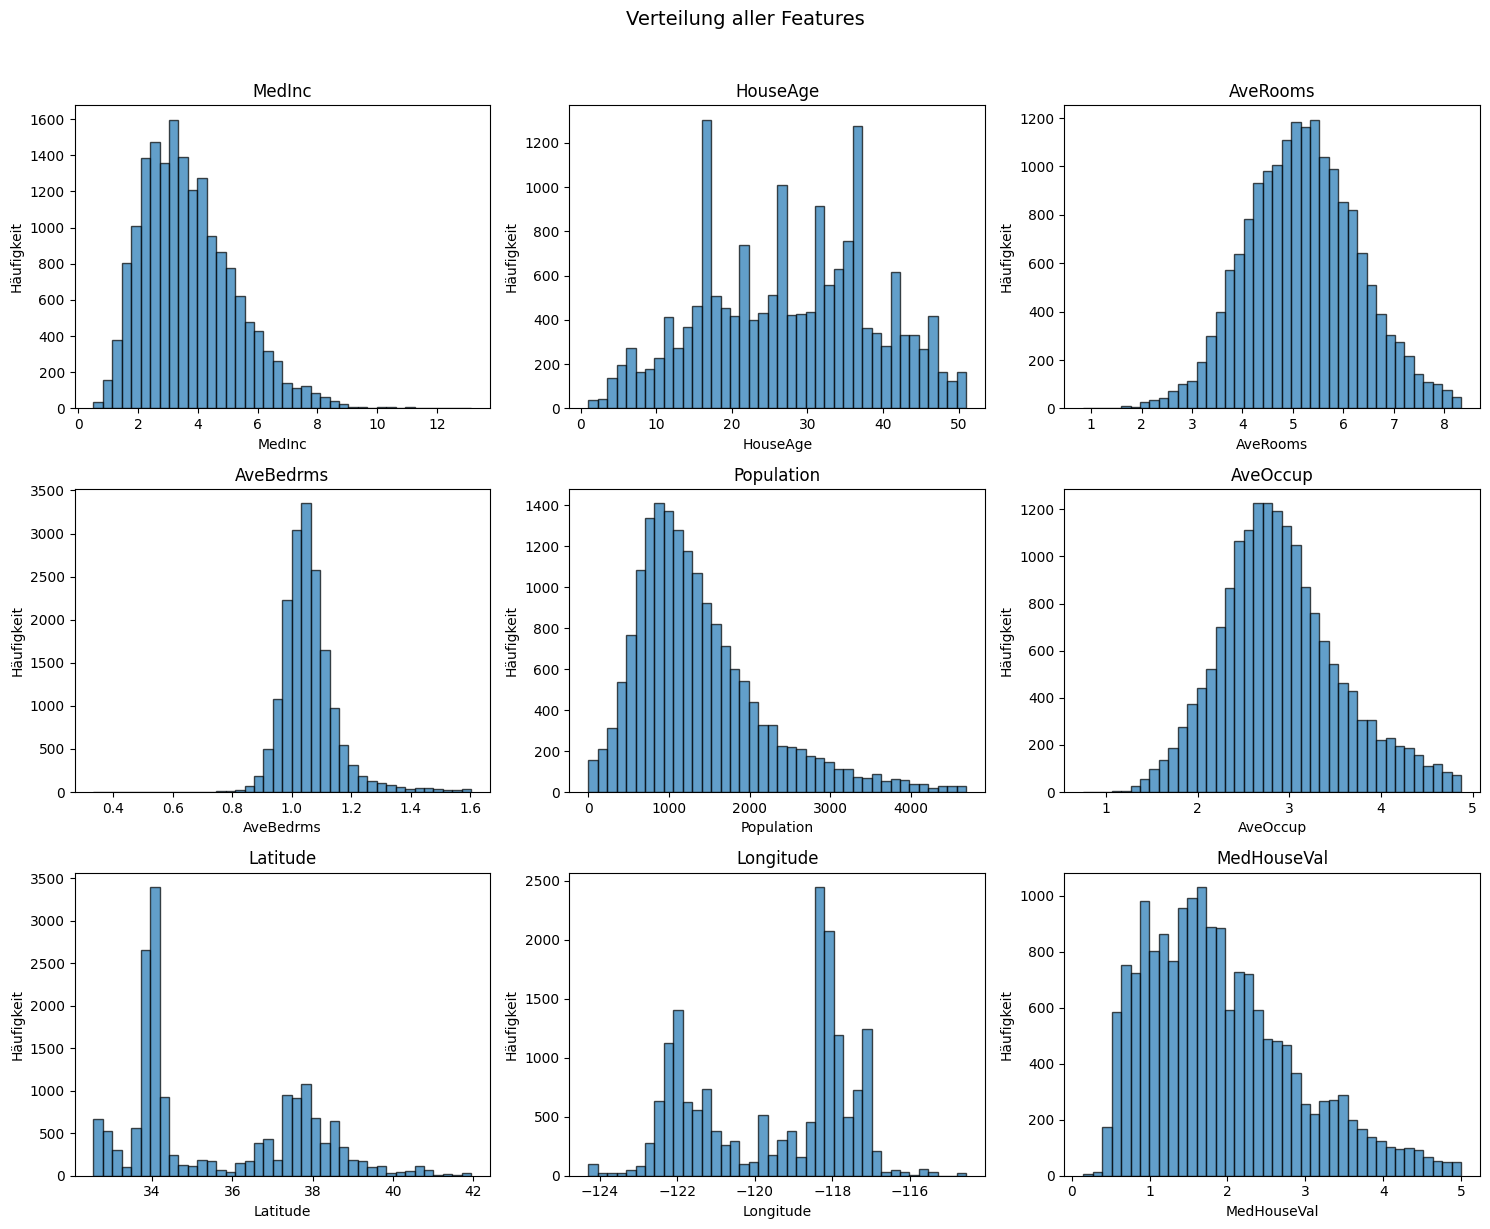

In [30]:
fig, axes = plot_histograms(df_clean, bins=40, save_name="eda_histograms_clean")
plt.show()

Gespeichert: results/eda_features_vs_target_clean.png und results/eda_features_vs_target_clean.pdf


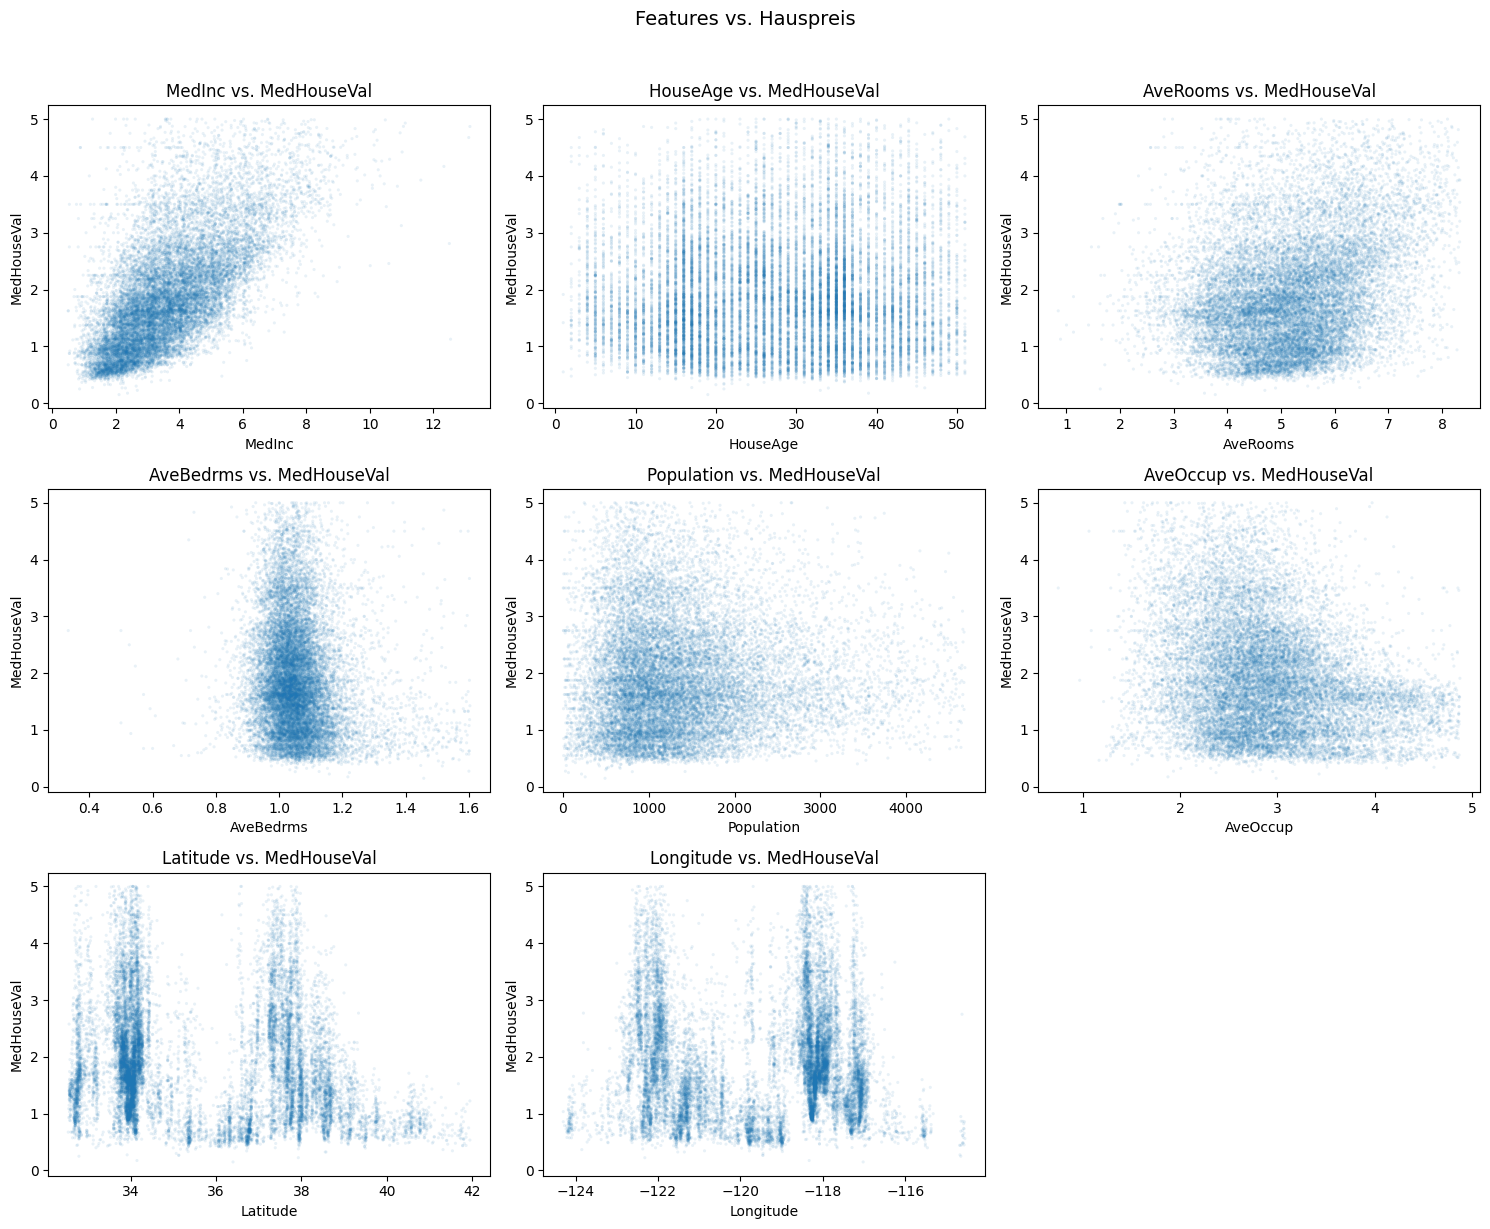

In [31]:
fig, axes = plot_features_vs_target(df_clean, save_name="eda_features_vs_target_clean")
plt.show()

## 1.5 Korrelationsanalyse

Gespeichert: results/eda_correlation_heatmap.png und results/eda_correlation_heatmap.pdf


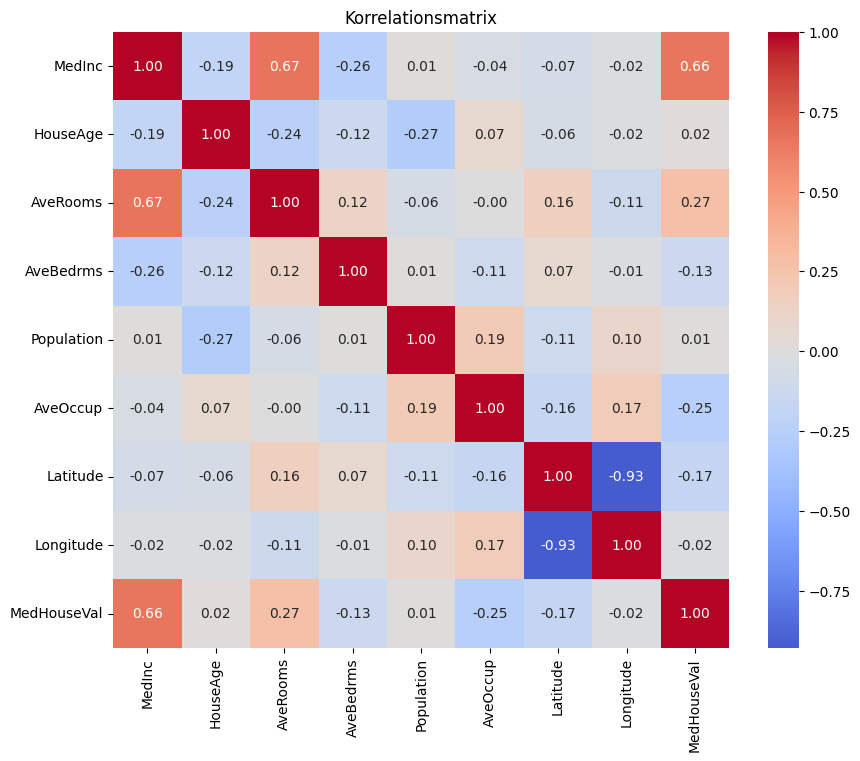

In [32]:
fig, ax = plot_correlation_heatmap(df_clean, save_name="eda_correlation_heatmap")
plt.show()

In [33]:
# Korrelation mit der Zielvariable, sortiert
corr_target = df_clean.corr()["MedHouseVal"].drop("MedHouseVal").sort_values(ascending=False)
print("Korrelation mit MedHouseVal:")
print(corr_target.to_string())

Korrelation mit MedHouseVal:
MedInc        0.659251
AveRooms      0.271879
HouseAge      0.024802
Population    0.012416
Longitude    -0.019278
AveBedrms    -0.127971
Latitude     -0.174653
AveOccup     -0.254479


## 1.6 Zusammenfassung der EDA

| Aspekt | Ergebnis |
|--------|----------|
| Datensatzgröße | ~20.640 → nach Bereinigung ~17.000+ |
| Stärkste Korrelation | MedInc ↔ MedHouseVal |
| Cut-offs entfernt | MedHouseVal=5.001, HouseAge=52 |
| Outlier-Methode | 98%-Quantil auf AveRooms, AveBedrms, Pop, AveOccup |
| Missing Values | Keine |

**Nächster Schritt:** Baseline mit Linearer Regression erstellen.